In [ ]:
<div class="alert alert-box alert-success">
<h1>Job recommendation system using knn , SVC ,AND RENDis</h1>
</div>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [6]:

df.head()



,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


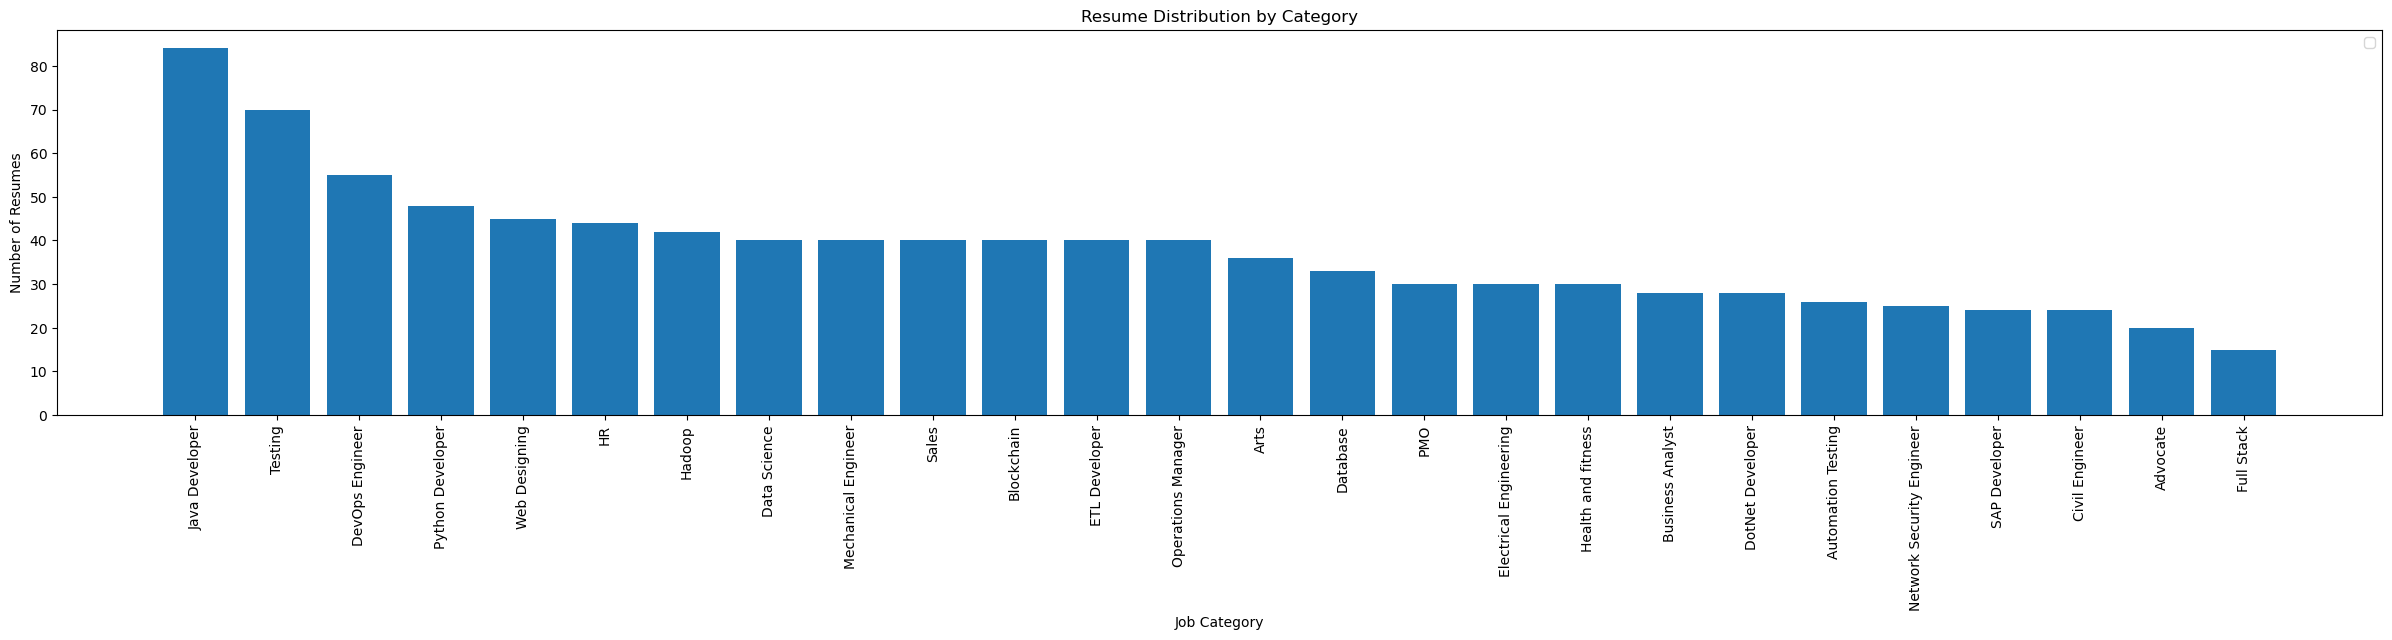

In [7]:
x = df["Category"]
y = df["Resume"]

category_counts = df["Category"].value_counts()

plt.figure(figsize=(30, 5))
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Job Category")
plt.ylabel("Number of Resumes")
plt.legend(title="")
plt.title("Resume Distribution by Category")
plt.show()


In [8]:
df['Category'].unique()


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing',
       'Full Stack'], dtype=object)

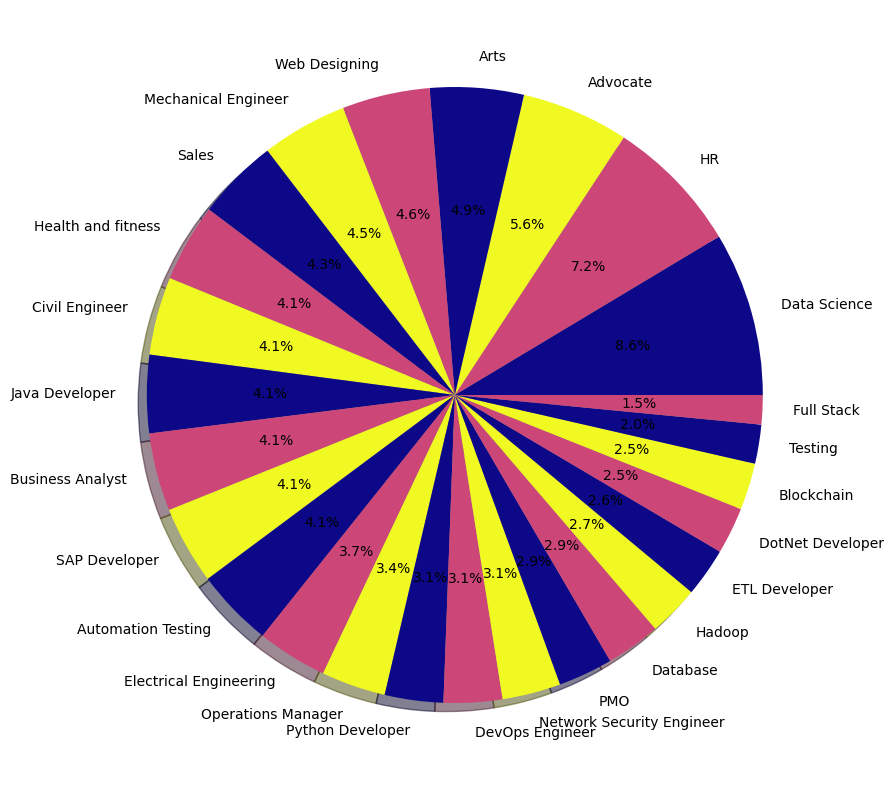

In [9]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [11]:
print("Original Category Distribution:")
print(df['Category'].value_counts())

max_size = df['Category'].value_counts().max()

#  oversampling
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

df = balanced_df.sample(frac=1).reset_index(drop=True)

print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())

Original Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Mechanical Engineer          40
Sales                        40
Blockchain                   40
ETL Developer                40
Operations Manager           40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Full Stack                   15
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
Python Developer             84
Full S

In [12]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [13]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [14]:
df['Resume'][0]

'Training attended 1 Su essfully completed ESD program conducted by Zensar Technologies Pune in 2017 2 Su essfully completed Employability training conducted by Barclays Global Talent Track and NASSCOM foundation in 2015 Achievements 1 Treasurer in IEEE student branch at JSCOE Pune for 2017 18 2 Worked as team leader in college s various technical and cultural events from 2016 2017 3 Project idea got selected for final prototyping round in KPIT Sparkle 2018 Pune 4 Participated in Avishkar 2017 conducted by Savitribai Phule Pune University 5 Project idea submitted in A enture Innovation 2018 Pune 6 Brought sponsorship of Rs 15 000 from Platinum Auto formerly Royal Enfield in 2017 Pune 7 Secured 1 st Rank for college level competition of Poster presentation on Smart ambulance in 2017 Pune 8 Organized IEEE workshop on Excellence in English and Public Speaking in 2017 Pune Workshops attended 1 Su essfully completed 4 days workshop on Medical IOT conducted by IEEE standard s association at 

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [17]:
df.Category.unique()

array([21, 12,  5, 18, 19,  8, 10, 14,  9, 17, 13,  6,  2, 23, 25,  4,  3,
       22, 15, 16,  1, 20, 24,  7, 11,  0])

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [21]:

X_train.shape

(1747, 7380)

In [22]:
X_test.shape

(437, 7380)

In [23]:
# train our model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [24]:
knn_model = OneVsRestClassifier(LogisticRegression())
kmodel = knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)



print("\nKNeighborsClassifier Results:")


accuracy = accuracy_score(y_test, y_pred_knn)
percentage = accuracy * 100

print(f"Accuracy: {percentage:.2f}%")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")



KNeighborsClassifier Results:
Accuracy: 99.54%
Confusion Matrix:
[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 23  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  

In [25]:

# 2. Train SVC
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 0.9977
Confusion Matrix:
[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 15 

In [26]:
# 3. Train RandomForestClassifier
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 0.9977
Confusion Matrix:
[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0

In [27]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

In [28]:
# Function to predict the category of a resume
def pred(input_resume):
    cleaned_text = cleanResume(input_resume) 

    vectorized_text = tfidf.transform([cleaned_text])
    
    vectorized_text = vectorized_text.toarray()

    predicted_category = svc_model.predict(vectorized_text)

    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [29]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""
pred(myresume)

'Health and fitness'

In [30]:
myresume=""" OBJECTIVE
 Innovative Full Stack Developer with advanced expertise in the MERN stack (MongoDB, Express.js, React.js, Node.js)
 and professional UI/UX design experience. Currently in the third year of a B.Tech in Computer Science. Skilled in
 building scalable, responsive, and user-friendly applications for real-world industries, particularly in the health and
 f
 itness sector. Possess foundational knowledge of Machine Learning with Python and a strong passion for creating
 impactful, data-driven solutions.
 EDUCATION
 Bachelor of Technology (B.Tech) in Computer Science, Uttaranchal University
 Expected 2027
 Relevant Coursework: Data Structures, Algorithms, Database Management Systems, Operating Systems
 TECHNICAL SKILLS
 Web Development
 UI/UX Design
 Programming
 Tools & Platforms
 Soft Skills
 EXPERIENCE
 MERN Stack (MongoDB, Express.js, React.js, Node.js), REST API Development, Authentication, State Management (Redux)
 Figma, Wireframing, Prototyping, Responsive Web Design, User Research, Accessibility Standards
 JavaScript (ES6+), HTML5, CSS3, Python (Basic ML Libraries: NumPy, Pandas, scikit-learn)
 Git, GitHub, Firebase, Vercel, Netlify, Postman, VS Code
 Team Leadership, Problem-Solving, Collaboration, Agile Methodologies
 Front-End Developer & Design Lead
 Triple A Fitness Dev Team
 January 2025– Present
 Dehradun, Uttarakhand
 • Led front-end architecture and UI/UX design for the Triple A Fitness web app, ensuring 100% mobile respon
siveness and smooth cross-platform performance.
 • Designed and implemented modern, user-centric interfaces using React.js, Tailwind CSS, and Figma prototypes.
 • Collaborated with backend developers to integrate REST APIs, real-time attendance tracking, and secure au
thentication workflows.
 • Enhanced user engagement by 35% through UI redesign and improved navigation flows.
 PROJECTS
 Gym Management Web Application
 • End-to-end MERN stack application for gym operations including member onboarding, QR code attendance,
 payment processing, and workout scheduling.
 • Integrated Firebase for authentication, Razorpay API for payments, and MongoDB for scalable data storage.
 • Deployed on Vercel with CI/CD workflows for faster updates.
 Property Management Application
 • Developed a property listing and rental management system with landlord-tenant communication, rent re
minders, and document uploads.
 • Implemented secure authentication, property search with advanced filters, and responsive layouts for mobile-first
 usage"""
pred(myresume)

'Full Stack'

In [31]:
myresume="""AMIT RAWAT
 +91 9639925569 ⋄ Dehradun, Uttarakhand
 rawatamit446@gmail.com ⋄ linkedin.com/in/amit-singh-rawat-bb056524a
 OBJECTIVE
 Innovative Full Stack Developer with advanced expertise in the MERN stack (MongoDB, Express.js, React.js, Node.js)
 and professional UI/UX design experience. Currently in the third year of a B.Tech in Computer Science. Skilled in
 building scalable, responsive, and user-friendly applications for real-world industries, particularly in the health and
 f
 itness sector. Possess foundational knowledge of Machine Learning with Python and a strong passion for creating
 impactful, data-driven solutions.
 EDUCATION
 Bachelor of Technology (B.Tech) in Computer Science, Uttaranchal University
 Expected 2027
 Relevant Coursework: Data Structures, Algorithms, Database Management Systems, Operating Systems
 TECHNICAL SKILLS
 Web Development
 UI/UX Design
 Programming
 Tools & Platforms
 Soft Skills
 EXPERIENCE
 MERN Stack (MongoDB, Express.js, React.js, Node.js), REST API Development, Authentication, State Management (Redux)
 Figma, Wireframing, Prototyping, Responsive Web Design, User Research, Accessibility Standards
 JavaScript (ES6+), HTML5, CSS3, Python (Basic ML Libraries: NumPy, Pandas, scikit-learn)
 Git, GitHub, Firebase, Vercel, Netlify, Postman, VS Code
 Team Leadership, Problem-Solving, Collaboration, Agile Methodologies
 Front-End Developer & Design Lead
 Triple A Fitness Dev Team
 January 2025– Present
 Dehradun, Uttarakhand
 • Led front-end architecture and UI/UX design for the Triple A Fitness web app, ensuring 100% mobile respon
siveness and smooth cross-platform performance.
 • Designed and implemented modern, user-centric interfaces using React.js, Tailwind CSS, and Figma prototypes.
 • Collaborated with backend developers to integrate REST APIs, real-time attendance tracking, and secure au
thentication workflows.
 • Enhanced user engagement by 35% through UI redesign and improved navigation flows.
 PROJECTS
 Gym Management Web Application
 • End-to-end MERN stack application for gym operations including member onboarding, QR code attendance,
 payment processing, and workout scheduling.
 • Integrated Firebase for authentication, Razorpay API for payments, and MongoDB for scalable data storage.
 • Deployed on Vercel with CI/CD workflows for faster updates.
 Property Management Application
 • Developed a property listing and rental management system with landlord-tenant communication, rent re
minders, and document uploads.
 • Implemented secure authentication, property search with advanced filters, and responsive layouts for mobile-first
 usage.
 Health and Fitness Sector Applications
• Built multiple web and mobile apps for fitness tracking, personalized diet plans, and community engagement.
 • Applied UI/UX best practices to increase retention and usability across diverse age groups.
 EXTRA-CURRICULAR ACTIVITIES
 • Represented university in inter-college basketball tournaments.
 • Active member of university coding club, participating in hackathons and coding competitions.
 • Enthusiastic PC gamer, regularly competing in online tournaments.
 LEADERSHIP
 • Directed design and front-end development for multiple full stack projects with 5+ member teams.
 • Conducted workshops on MERN stack and UI/UX design for university peers"""
pred(myresume)

'Full Stack'